In [2]:
from evaluations import *
acc =1e-2
boundary = 'robin'
coarse_grid_resolution = 10
p = helmholtz(boundary = boundary)
infsups = []
conts = []
for k in range(1,100):
    print k
    resolution  = int(np.ceil(float(k*1.5+50)/coarse_grid_resolution)*coarse_grid_resolution)
    cglob = -1j*k
    cloc0 = 0
    cloc1 = 0.02*(5-1j)
    cloc2 = 0.0016*(8-1j)
    cloc = cloc0+ cloc1*k+cloc2*k**2
    mus = {'k': k, 'c_glob': cglob, 'c_loc': cloc}
    gq, lq = localize_problem(p, coarse_grid_resolution, resolution, mus = mus)
    infsups.append(calculate_inf_sup_constant2(gq,lq))
    conts.append(calculate_continuity_constant(gq,lq))

1
localizing problem
calculated_inf_sup_constant:  0.890186370566
calculated_continuity_constant:  4.30020182517
2
localizing problem
calculated_inf_sup_constant:  0.652513712775
calculated_continuity_constant:  2.59635436311
3
localizing problem
calculated_inf_sup_constant:  0.444885309922
calculated_continuity_constant:  2.14909574128
4
localizing problem
calculated_inf_sup_constant:  0.317046219858
calculated_continuity_constant:  1.95861636953
5
localizing problem
calculated_inf_sup_constant:  0.255392002573
calculated_continuity_constant:  1.85501791755
6
localizing problem
calculated_inf_sup_constant:  0.227325649277
calculated_continuity_constant:  1.79186818672
7
localizing problem
calculated_inf_sup_constant:  0.196063664283
calculated_continuity_constant:  1.7513955008
8
localizing problem
calculated_inf_sup_constant:  0.17439015845
calculated_continuity_constant:  1.72466141445
9
localizing problem
calculated_inf_sup_constant:  0.148024774472
calculated_continuity_constant: 

KeyboardInterrupt: 

In [13]:
from evaluations import *
acc =1e-2
boundary = 'dirichlet'
coarse_grid_resolution = 10
p = helmholtz(boundary = boundary)
infsups = []
conts = []
rang = np.arange(.2,5.2,.2)
for k in rang:
    print k
    resolution  = int(np.ceil(float(k*1.5+50)/coarse_grid_resolution)*coarse_grid_resolution)
    cglob = -1j*k
    cloc0 = 0
    cloc1 = 0.02*(5-1j)
    cloc2 = 0.0016*(8-1j)
    cloc = cloc0+ cloc1*k+cloc2*k**2
    mus = {'k': k, 'c_glob': cglob, 'c_loc': cloc}
    d, data = discretize_elliptic_cg(p, diameter = 1./resolution)
    op = d.operator.assemble(mus)
    full_l2_product = d.products["l2"].assemble()
    full_h1_semi_product = d.products["h1_semi"].assemble()
    k_product = LincombOperator((full_h1_semi_product,full_l2_product),(1,mus["k"]**2)).assemble()
    prod = k_product
    
    A = op._matrix
    H1 = prod._matrix
    Y = H1
    X = H1

    try:
        a = data['boundary_info'].dirichlet_boundaries(2)
        b = np.arange(A.shape[0])
        c = np.delete(b,a)
        A = A[:,c][c,:]
        X = X[:,c][c,:]
        Y = Y[:,c][c,:]
    except KeyError:
        pass

    Yinv = sp.factorized(Y.astype(complex))
    def mv(v):
        return A.H.dot(Yinv(A.dot(v)))
    M1 = LinearOperator(A.shape, matvec = mv)
    
    eigvals = sp.eigs(M1, M=X, k=1, tol = 1e-4)[0]
    eigvals = np.sqrt(np.abs(eigvals))
    eigvals[::-1].sort()
    conts.append(eigvals[0])
    
    eigvals = sp.eigs(M1, M=X, which = 'SM', tol = 1e-1, k=100)[0]
    eigvals = np.sqrt(np.abs(eigvals))
    eigvals.sort()
    infsups.append(eigvals[0])

0.2
0.4
0.6
0.8
1.0
1.2
1.4
1.6
1.8
2.0
2.2
2.4
2.6
2.8
3.0
3.2
3.4
3.6
3.8
4.0
4.2
4.4
4.6
4.8
5.0


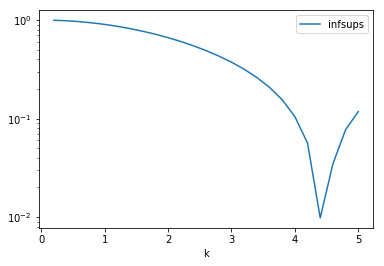

In [14]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure()
plt.semilogy(rang, infsups, label = "infsups")
plt.legend(loc='upper right')
plt.xlabel('k')
plt.show()

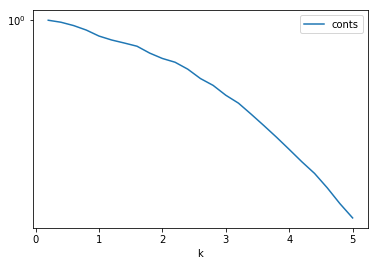

In [15]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure()
plt.semilogy(rang, conts, label = "conts")
plt.legend(loc='upper right')
plt.xlabel('k')
plt.show()

In [17]:
quot = np.array(conts)/np.array(infsups)

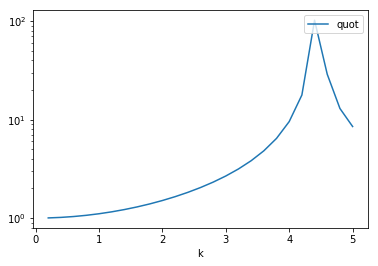

In [18]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure()
plt.semilogy(rang, quot, label = "quot")
plt.legend(loc='upper right')
plt.xlabel('k')
plt.show()